In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import random


from main_algo import splbfgs

torch.manual_seed(0)
np.random.seed(0)
torch.set_default_dtype(torch.float64)

In [8]:
from sklearn.datasets import load_svmlight_file
from scipy.sparse.linalg import norm
w8a = load_svmlight_file('../datasets/w8a_train.libsvm')
X4 = w8a[0]
y4 = w8a[1]
y4[y4 == -1] = 0
w8a_test = load_svmlight_file('../datasets/w8a_test.libsvm')
X4t = w8a_test[0]
y4t = w8a_test[1]
y4t[y4t == -1] = 0
# np.sum(y4)/len(y4)
# X4.shape
L4 = np.mean(norm(X4, ord=2, axis=1) ** 2)
X4

<49749x300 sparse matrix of type '<class 'numpy.float64'>'
	with 579586 stored elements in Compressed Sparse Row format>

In [9]:
# loading the optimal value
data = np.load('../sequences/w8a_optimal.npz')
data_t = np.load('../sequences/w8a_test_optimal.npz')
x4_star = data['x_star']
x4t_star = data_t['x_star']
loss4_star = data['loss_star']
loss4t_star = data_t['loss_star']

In [10]:
p = 0.01
lam = 1e-3
mu = 1e-3

w0 = 0.01 * torch.ones(X4.shape[1])
y4 = torch.from_numpy(y4)

In [11]:
torch.manual_seed(2) # depend on seed
loss, para, info = splbfgs(X=X4, y=y4, b=256, bH=6000, M=10, L=10, alpha=0.012, prob=p, w=w0, n_epochs=600, lam=lam, mu=mu, optimizer='ssn')

100%|██████████| 600/600 [00:12<00:00, 47.52it/s]


In [12]:
info

[1.6211862564086914, 4.63103448275862, 6, 5.5, 0.08703804016113281]

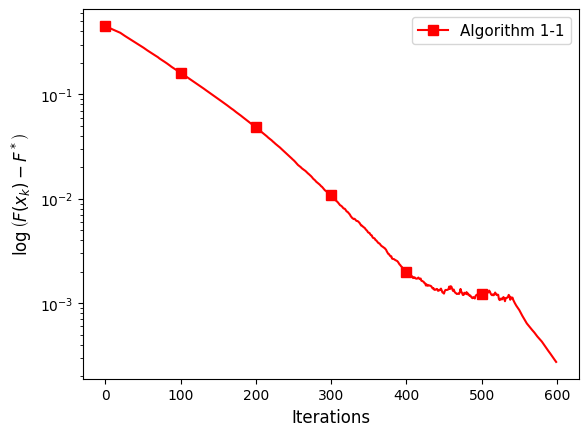

In [13]:
plt.plot(loss-loss4_star, label=f'Algorithm 1-1', color='r', marker='s', markersize=7, markevery=100)
plt.legend(fontsize=11)
plt.yscale('log')
plt.xlabel('Iterations', fontsize=12)
plt.ylabel(r'$\log\left(F(x_k)-F^*\right)$', fontsize=12)
plt.show()

In [2]:
# generate synthetic sparse data, do not run
n = 10000
d = 100000
X = random(n, d, density=0.001, format='csr')
y = torch.randint(0, 2, (n,))

In [5]:
# save the sparse matrix
from scipy.sparse import save_npz, load_npz
save_npz('sparse_matrix.npz', X)

In [9]:
p = 0.01
lam = 1e-3
mu = 1e-3
X = load_npz('sparse_matrix.npz')

w0 = 0.01 * torch.ones(X.shape[1])

In [16]:
torch.manual_seed(2) # depend on seed
loss, para, info = splbfgs(X=X, y=y, b=256, bH=600, M=10, L=10, alpha=0.02, prob=p, w=w0, n_epochs=100, lam=lam, mu=mu, optimizer='ssn')

100%|██████████| 100/100 [00:14<00:00,  6.70it/s]


In [11]:
info

[19.129650831222534,
 4.543103448275862,
 59,
 18.677966101694917,
 0.3315694332122803]

In [1]:
plt.plot(loss, label=f'Algorithm 1-1', color='r', marker='s', markersize=7, markevery=100)
plt.legend(fontsize=11)
# plt.yscale('log')
plt.xlabel('Iterations', fontsize=12)
plt.ylabel(r'$\log\left(F(x_k)-F^*\right)$', fontsize=12)
plt.show()

NameError: name 'plt' is not defined